# Used Car Price Prediction

This project aims to demonstrate how to perform exploratory data analysis (EDA) and subsequently build, test, and compare models using Linear Regression, Random Forest, and Gradient Boosted Trees (GBT).

The dataset used is sourced from Kaggle, and the visualizations and models are created using Python libraries.

With an improved dataset, we can build a more accurate used car price prediction model.

## Import Libraries

In [673]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Checking Dataset

In [675]:
df = pd.read_csv("cardekho.csv")

In [677]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78,5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.2,5.00


In [679]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.00,8128.00,8128.00,7907.00,7907.00,7907.00
mean,2013.80,638271.81,69819.51,19.42,1458.63,5.42
std,4.04,806253.40,56550.55,4.04,503.92,0.96
min,1983.00,29999.00,1.00,0.00,624.00,2.00
25%,2011.00,254999.00,35000.00,16.78,1197.00,5.00
50%,2015.00,450000.00,60000.00,19.30,1248.00,5.00
75%,2017.00,675000.00,98000.00,22.32,1582.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,14.00


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [683]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [685]:
df = df.dropna()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78,5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.2,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.00,82.85,5.00
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.00,110,5.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.00,73.9,5.00
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.00,70,5.00


## Exploratory Data Analysis

C:\Users\braja\AppData\Local\Temp\ipykernel_11416\1538753665.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


Text(0.5, 1.0, 'Car Price Distribution')

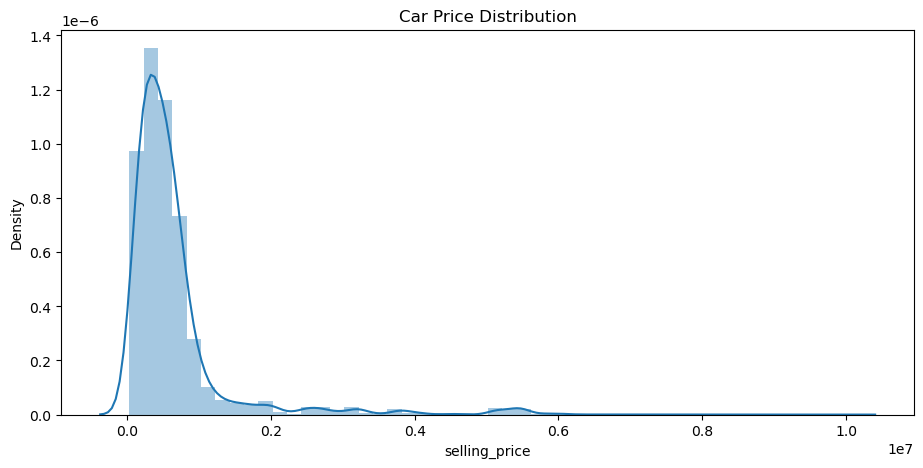

In [687]:
# Drawing plot for car price distribution
plt.figure(figsize=[11,5])
sns.distplot(df['selling_price'])
plt.title('Car Price Distribution')

C:\Users\braja\AppData\Local\Temp\ipykernel_11416\800425352.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])
C:\Users\braja\AppData\Local\Temp\ipykernel_11416\800425352.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['km_driven'])
C:\Users\braja\AppData\Local\Temp\ipykernel

Text(0.5, 1.0, 'Engine Distribution Plot')

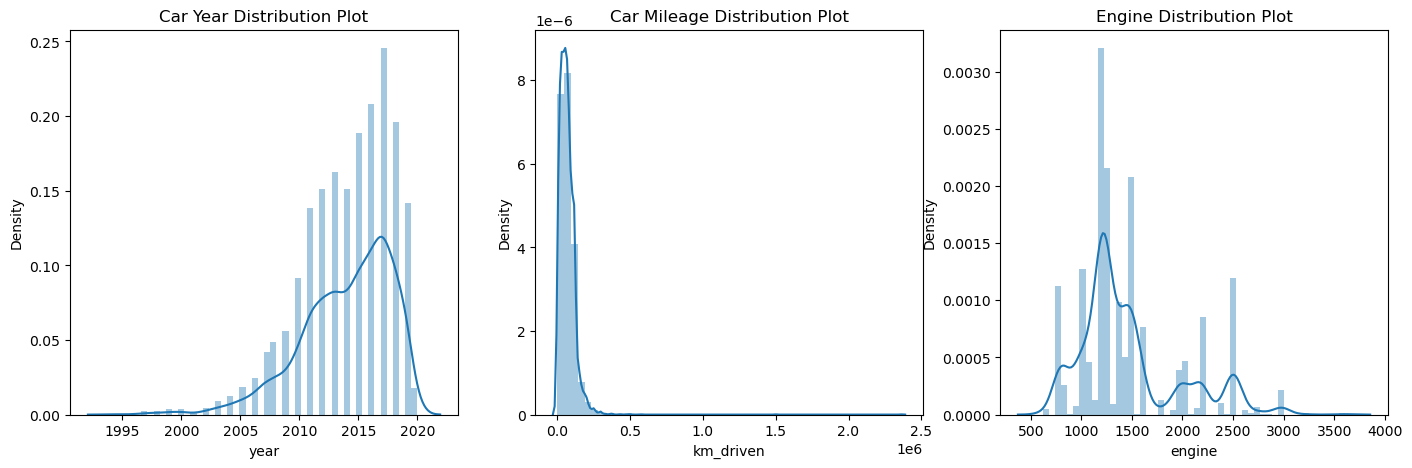

In [689]:
# year, mileage, engine Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df['year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df['km_driven'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df['engine'])
plt.title('Engine Distribution Plot')

From the plot we can see the graph is skewed. The next step is to check the outliers.

## Dealing With Outliers

In [691]:
# Make variable q for the 95th percentile of the 'Price' variable
q = df['selling_price'].quantile(0.95)

# Then we can create a new df, with the condition that all prices must be below the percentile of 'Price'
data_1 = df[df['selling_price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

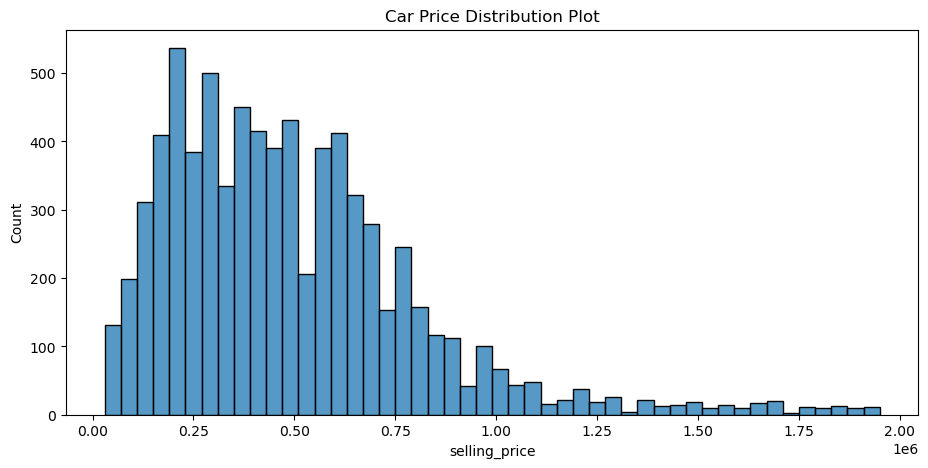

In [693]:
# Draw the plot
plt.figure(figsize=[11,5])
sns.histplot(data_1['selling_price'])
plt.title('Car Price Distribution Plot')

In [695]:
# Do the same for mileage
q = data_1['km_driven'].quantile(0.95)
data_2 = data_1[data_1['km_driven']<q]

<Axes: xlabel='km_driven', ylabel='Count'>

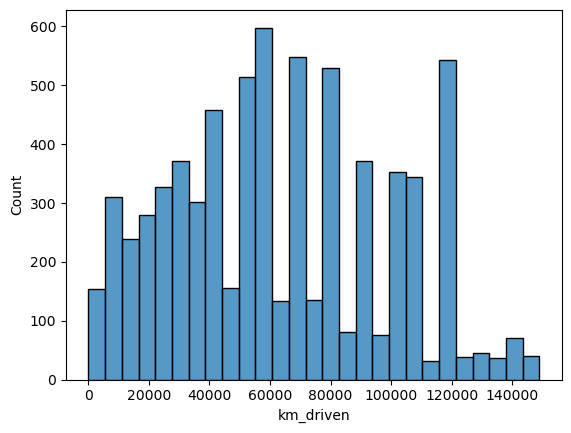

In [697]:
sns.histplot(data_2['km_driven'])

In [701]:
# Do the same for production year
q = data_2['year'].quantile(0.05)
data_3 = data_2[data_2['year']>q]

<Axes: xlabel='year', ylabel='Count'>

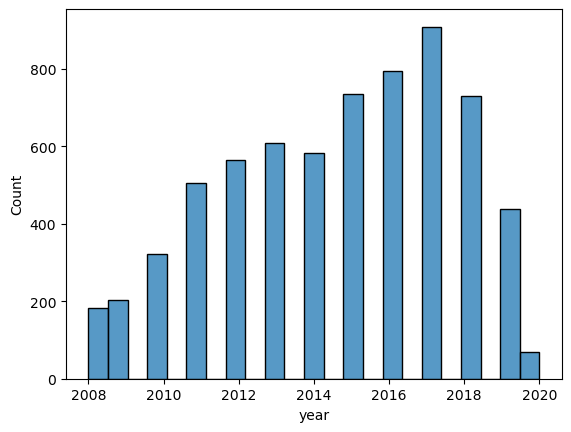

In [703]:
sns.histplot(data_3['year'])

In [705]:
# And for the engine, we limit the dataset for cars below 3,000
data_4 = data_3[data_3['engine']<3000]

<Axes: xlabel='engine', ylabel='Count'>

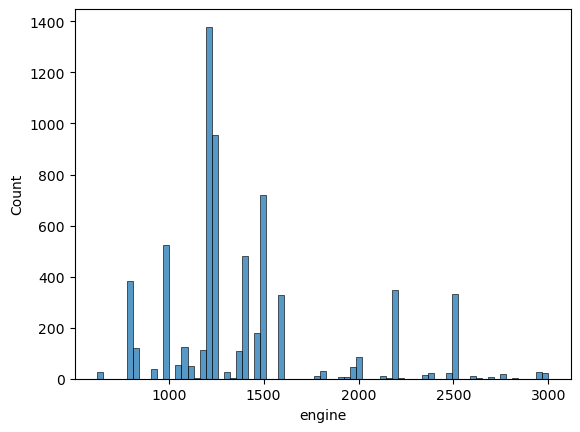

In [707]:
sns.histplot(data_4['engine'])

In [709]:
cleaned_df = data_4.reset_index(drop=True)

<Axes: title={'center': 'Price and Engine'}, xlabel='selling_price', ylabel='engine'>

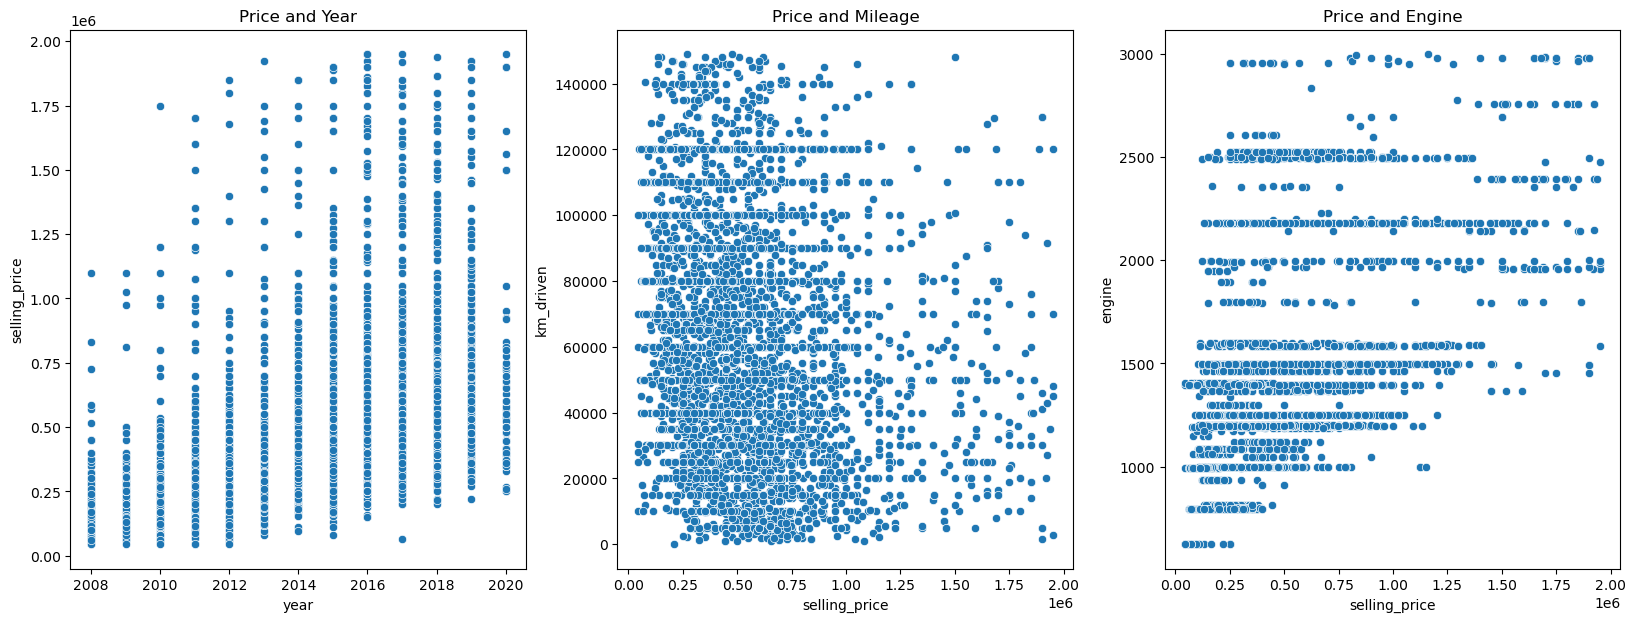

In [711]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='year',y='selling_price',data=cleaned_df)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='selling_price',y='km_driven',data=cleaned_df)

plt.subplot(1,3,3)
plt.title("Price and Engine")
sns.scatterplot(x='selling_price',y='engine',data=cleaned_df)

In [713]:
# Transform 'Price' with a log transformation
log_price = np.log(cleaned_df['selling_price'])

# Then we add it to our data frame
cleaned_df['log_price'] = log_price
cleaned_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,log_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74,5.00,13.02
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00,12.82
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90,5.00,12.32
3,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,5.00,12.99
4,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.00,67.1,5.00,12.77


<Axes: title={'center': 'Log price and Engine'}, xlabel='engine', ylabel='log_price'>

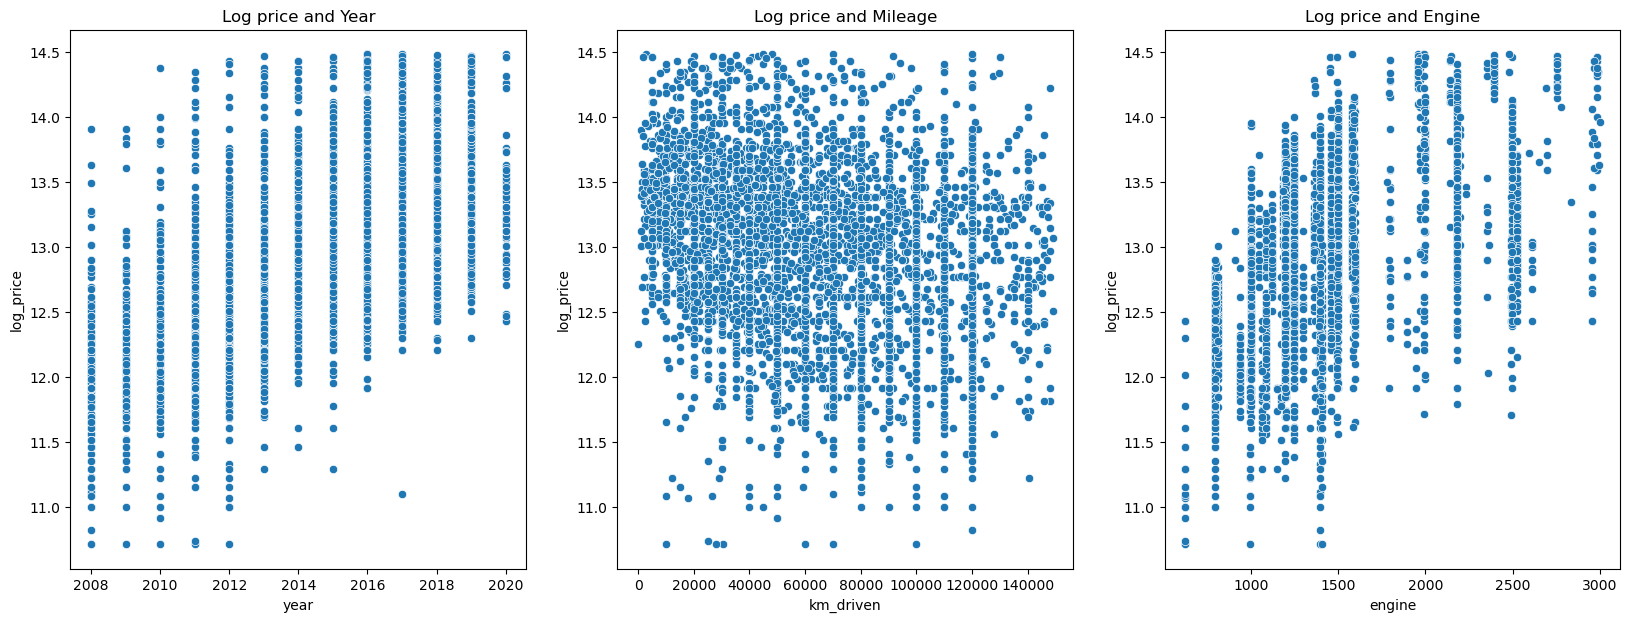

In [715]:
# Create Log Price Plot
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='year',y='log_price',data=cleaned_df)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='km_driven',data=cleaned_df)

plt.subplot(1,3,3)
plt.title("Log price and Engine")
sns.scatterplot(y='log_price',x='engine',data=cleaned_df)

In [717]:
cleaned_data = cleaned_df.drop(['selling_price'],axis=1)

In [719]:
# Analyze the variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['km_driven','year', 'engine']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
print(vif)

    VIF   Features
0  4.45  km_driven
1 11.45       year
2 11.72     engine


In [729]:
# Remove the multicolinearity
# Notes: from the VIF we can see year and engine is above 10, but we will only drop engine for this sample
data_no_multicolinearity = cleaned_data.drop(['engine'],axis=1)

In [731]:
data_no_multicolinearity.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),max_power,seats,log_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,74,5.00,13.02
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,5.00,12.82
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,90,5.00,12.32
3,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,81.86,5.00,12.99
4,Toyota Etios VXD,2011,90000,Diesel,Individual,Manual,First Owner,23.59,67.1,5.00,12.77


## Features

In [733]:
# Transform features data
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Analyze correlated features with target variable
print('\n Correlated Features with target variable \n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


 Correlated Features with target variable 

year                 0.64
owner                0.31
fuel                 0.29
transmission         0.28
seats                0.26
km_driven            0.25
max_power            0.14
seller_type          0.13
mileage(km/ltr/kg)   0.05
name                 0.02
dtype: float64


<Axes: >

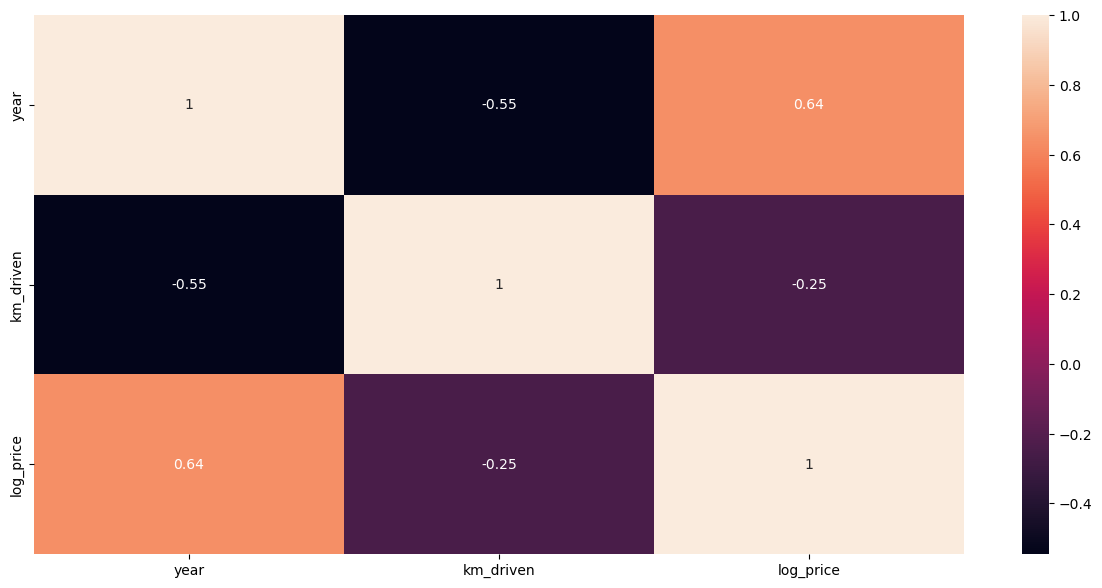

In [735]:
# Correlation heat map
cars_select_column = data_no_multicolinearity[['year', 'km_driven', 'log_price']]
plt.figure(figsize=[15,7])
sns.heatmap(cars_select_column.corr(), annot=True)

In [737]:
# Split data with Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

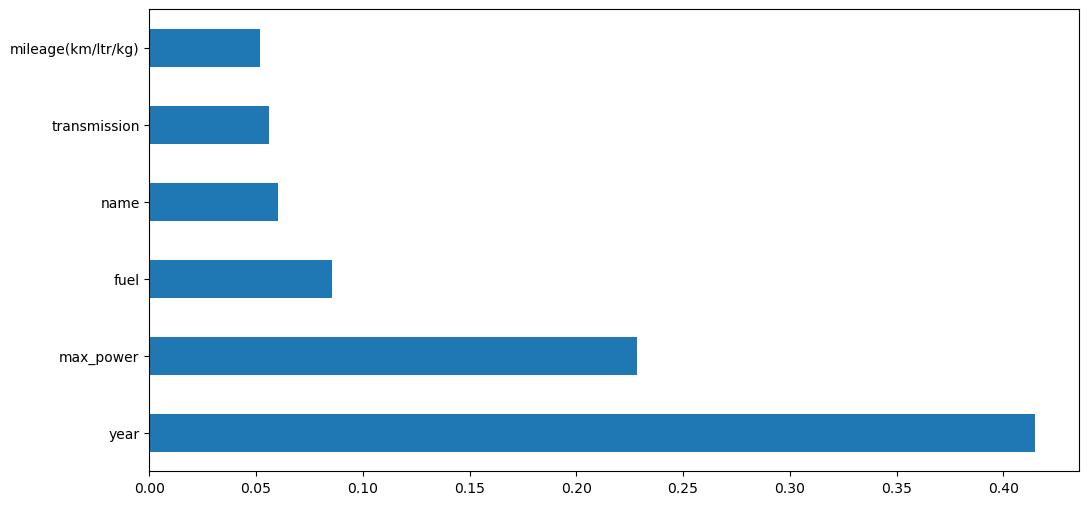

In [739]:
# Plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [741]:
# Creating Dummy Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [743]:
data_with_dummies.head()

,year,km_driven,mileage(km/ltr/kg),seats,log_price,name_Ambassador Grand 2000 DSZ PW CL,name_Audi A3 40 TFSI Premium,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,...,max_power_98.59,max_power_98.6,max_power_98.63,max_power_98.79,max_power_98.82,max_power_98.96,max_power_98.97,max_power_99,max_power_99.23,max_power_99.6
0,2014,145500,23.40,5.00,13.02,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,120000,21.14,5.00,12.82,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2010,127000,23.00,5.00,12.32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,45000,20.14,5.00,12.99,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2011,90000,23.59,5.00,12.77,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Modelling

In [745]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

In [747]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['year','km_driven']])

StandardScaler()

In [749]:
inputs_scaled = scaler.transform(x[['year','km_driven']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['year','km_driven'])

In [751]:
input_scaled2 =scaled_data.join(x.drop(['year','km_driven'],axis=1))

## Testing Data

In [753]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

### Linear Regression

In [755]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : -1.2689547077618282e+21
RMSE : 22295044393.690453


### Random Forest Model

In [757]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8890210109955285
RMSE : 0.20849980968147427


### GBT Model

In [759]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.814553451153471
RMSE : 0.26952227175070814


## Conclusion

We chose random forest model for this project, with R_squared : 0.8890210109955285 and Root Mean Square Error : 0.20849980968147427 as the best model.

In [765]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_rf), columns=['Predicted Price'])

# Include actual price column in that data frame
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# Calculate the difference between the price and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
1323,588182.11,600000.00,11817.89,1.97
1324,231281.91,225000.00,-6281.91,2.79
1325,519848.10,470000.00,-49848.10,10.61
1326,750000.00,750000.00,-0.00,0.00
1327,650000.00,650000.00,-0.00,0.00
